In [1]:
import numpy
import torch
import matplotlib.pyplot as plt

In [2]:
m = torch.distributions.Normal(torch.tensor([0.0]), torch.tensor([1.0]))
m.sample()

tensor([0.0361])

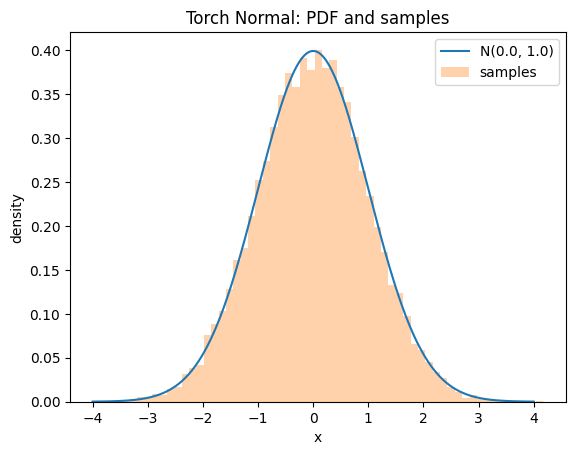

In [9]:
def plot_normal(mu=0.0, sigma=1.0, nsamples=20000, ngrid=1000, device=None):
    mu_t = torch.tensor(float(mu))
    sigma_t = torch.tensor(float(sigma))

    dist = torch.distributions.Normal(mu_t, sigma_t)

    # grid over ±4σ around the mean
    x = torch.linspace(mu - 4*sigma, mu + 4*sigma, ngrid)
    pdf = dist.log_prob(x).exp()          # density

    # move to CPU for plotting
    x_np = x.cpu().numpy()
    pdf_np = pdf.cpu().numpy()

    # draw curve + histogram of samples
    samples = dist.sample((nsamples,)).cpu().numpy()

    plt.figure()
    plt.plot(x_np, pdf_np, label=f"N({mu}, {sigma**2})")
    plt.hist(samples, bins=60, density=True, alpha=0.35, label="samples")
    plt.xlabel("x")
    plt.ylabel("density")
    plt.title("Torch Normal: PDF and samples")
    plt.legend()
    plt.show()

# usage
plot_normal(0.0, 1.0)
# plot_normal(2.0, 0.5)           # another example
# plot_normal(0.0, 1.0, device="cuda")  # if you want to force CUDA

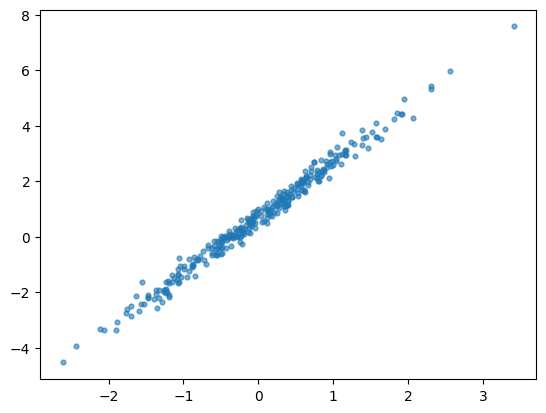

In [12]:
def make_linear(n=200, d=1, w=None, b=0.0, noise=0.1, seed=0, device="cpu", dtype=torch.float32):
    g = torch.Generator(device=device).manual_seed(seed)
    X = torch.randn(n, d, generator=g, device=device, dtype=dtype)
    if w is None:
        w = torch.randn(d, generator=g, device=device, dtype=dtype)
    b = torch.as_tensor(b, device=device, dtype=dtype)
    y = (X @ w) + b + noise*torch.randn(n, generator=g, device=device, dtype=dtype)
    return X, y, w, b

X, y, w_true, b_true = make_linear(n=300, d=1, w=torch.tensor([2.0]), b=0.7, noise=0.2)

import matplotlib.pyplot as plt

# Avoid PyTorch->NumPy dependency issues by passing Python lists if needed:
x_list = X[:, 0].detach().cpu().tolist()
y_list = y.detach().cpu().tolist()

plt.figure()
plt.scatter(x_list, y_list, s=12, alpha=0.6, label="data")

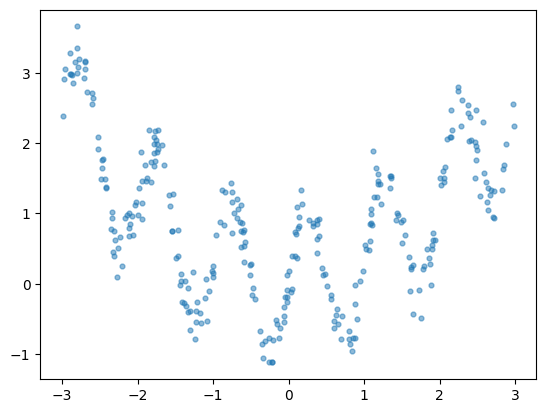

In [14]:
import math
# ----- 1) Make nonlinear data -----
def make_nonlinear(n=300, lo=-3.0, hi=3.0, noise=0.2, seed=0, device="cpu", dtype=torch.float32):
    g = torch.Generator(device=device).manual_seed(seed)
    X = (hi - lo) * torch.rand(n, 1, generator=g, device=device, dtype=dtype) + lo
    f = lambda x: torch.sin(2*math.pi*x) + 0.3*(x**2)  # ground-truth nonlinearity
    y = f(X) + noise*torch.randn(n, 1, generator=g, device=device, dtype=dtype)
    return X, y, f

X, y, f_true = make_nonlinear()
plt.figure()
plt.scatter(X[:,0].cpu().tolist(), y[:,0].cpu().tolist(), s=12, alpha=0.5, label="data")